In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})  # Avoid warnings for too many figures


In [35]:
# Paths to the data produced in Notebook 2
id_degree_dist_path = './../../data/analysis/id_degree_distribution.csv'
vat_degree_dist_path = './../../data/analysis/vat_degree_distribution.csv'

# Load the degree distribution data
id_degree_dist = pd.read_csv(id_degree_dist_path)
vat_degree_dist = pd.read_csv(vat_degree_dist_path)
id_degree_dist.head()

,time_window,ID,degree_size,total_vart,log_ID_degree
0,0,215,3,656617,0.477121
1,0,330,8,23943,0.903090
2,0,397,2,190830,0.301030
3,0,413,22,971404,1.342423
4,0,488,1,1722,0.000000


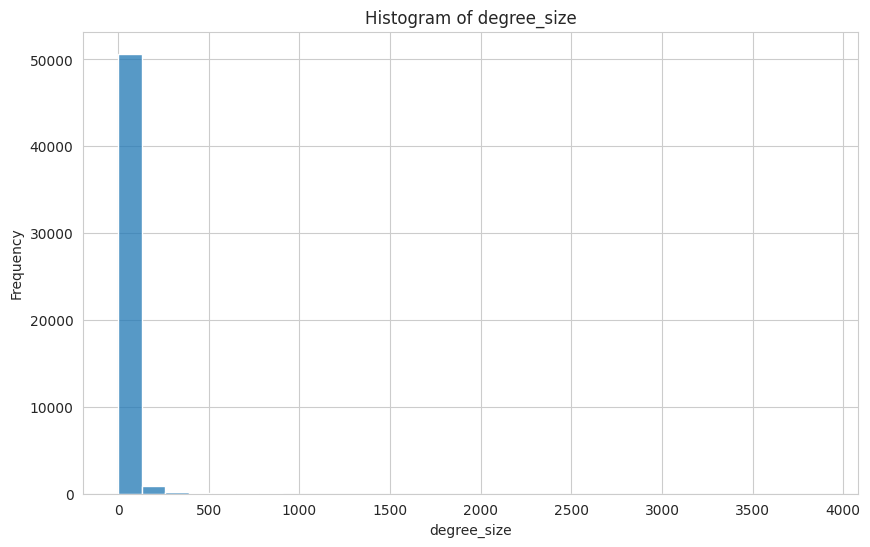

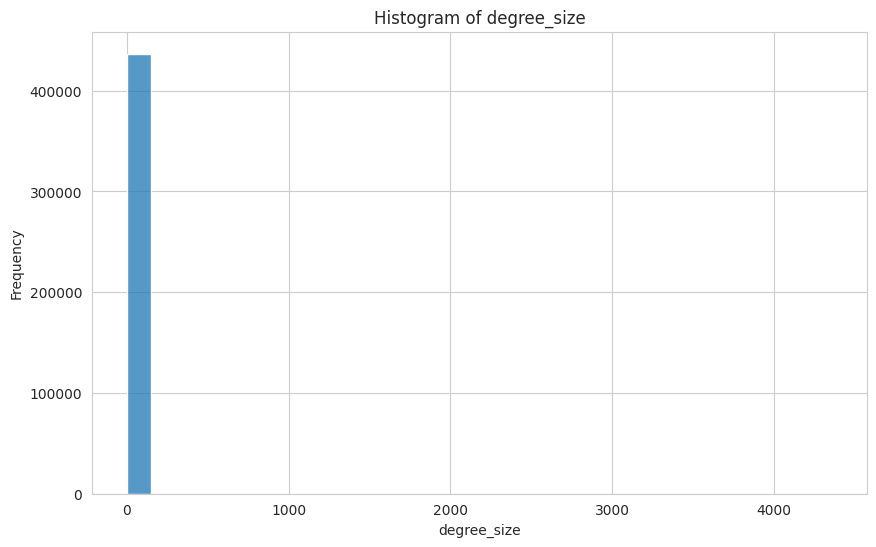

In [37]:
def plot_histograms(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False, bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Call the function for each degree type
plot_histograms(id_degree_dist, 'degree_size')
plot_histograms(vat_degree_dist, 'degree_size')


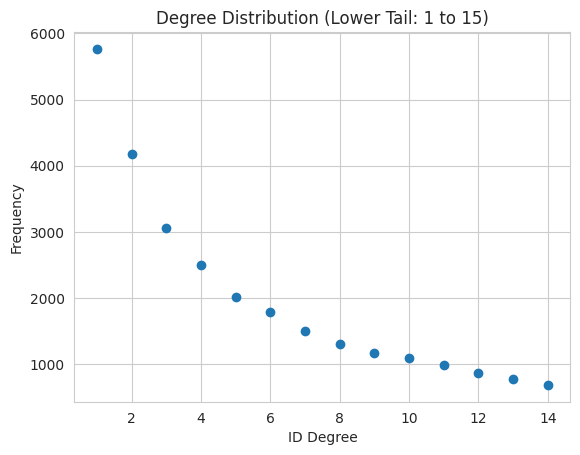

In [38]:
# Define the bins for the range 1 to 15
bins = pd.interval_range(start=1, end=15, freq=1)

# Group the data into these bins and get the count for each bin
lower_tail = id_degree_dist.groupby(pd.cut(id_degree_dist['degree_size'], bins)).size().reset_index(name='count')

# Plot the lower tail on a scatter plot
plt.scatter(lower_tail['degree_size'].apply(lambda x: x.mid).astype(int), lower_tail['count'])
plt.xlabel('ID Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Lower Tail: 1 to 15)')
plt.show()


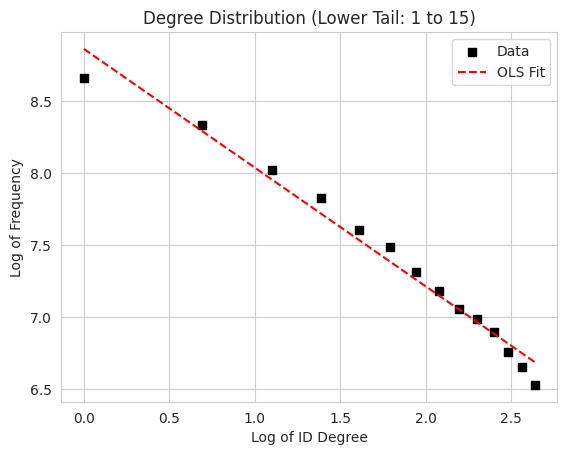

Slope (on log-log scale): -0.8237817167598561
R-squared: 0.9784267953815058


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats


# Define the bins for the range 1 to 15
bins = pd.interval_range(start=1, end=15, freq=1)

# Group the data into these bins and get the count for each bin
lower_tail = id_degree_dist.groupby(pd.cut(id_degree_dist['degree_size'], bins)).size().reset_index(name='count')

# Prepare data for OLS regression, fitting log(count) to log(ID_degree) to check for power-law (linear on log-log scale)
X = np.log(lower_tail['degree_size'].apply(lambda x: x.mid).astype(int)).values.reshape(-1, 1)
y = np.log(lower_tail['count']).values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate the fit line
x_fit = np.linspace(min(X), max(X), 100)
y_fit = model.predict(x_fit.reshape(-1, 1))

# Plot the lower tail on a scatter plot
plt.scatter(X, y, color='black', label='Data', marker='s')
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='OLS Fit')

# Convert the axis back to the original scale for display
plt.xlabel('Log of ID Degree')
plt.ylabel('Log of Frequency')
plt.title('Degree Distribution (Lower Tail: 1 to 15)')
plt.legend()
plt.show()

# Calculate and print the OLS regression results
slope, intercept, r_value, p_value, std_err = stats.linregress(X.ravel(), y)
print(f"Slope (on log-log scale): {slope}")
print(f"R-squared: {r_value**2}")


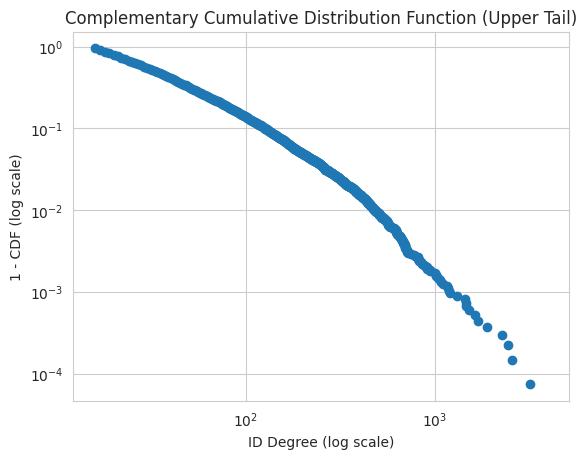

In [ ]:
# To visualize the upper tail, we focus on the part of the distribution that goes beyond 15
upper_tail = id_degree_dist[id_degree_dist['ID_degree'] > 15]

# Calculate the CCDF
ccdf = 1 - upper_tail['ID_degree'].value_counts(normalize=True).sort_index().cumsum()

# Plot the CCDF on a log-log plot
plt.loglog(ccdf.index, ccdf, marker='o', linestyle='none')
plt.xlabel('ID Degree (log scale)')
plt.ylabel('1 - CDF (log scale)')
plt.title('Complementary Cumulative Distribution Function (Upper Tail)')
plt.show()


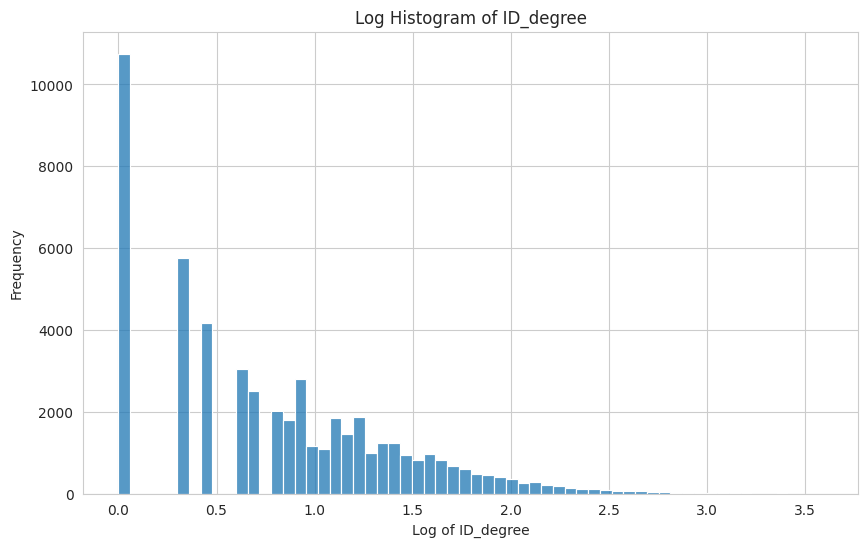

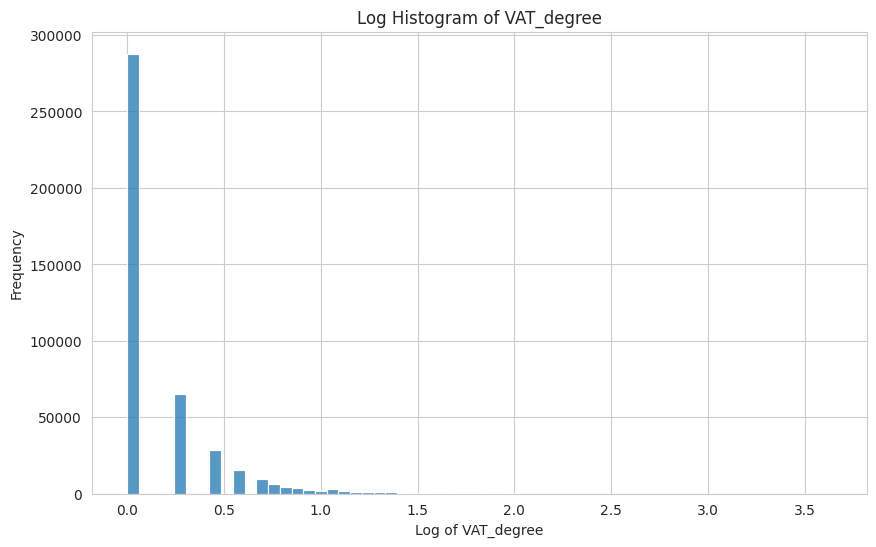

In [ ]:

# Function to plot logarithmic histograms
def plot_log_histograms(df, column):
    df = df[df[column] > 0]  # Remove zeros to avoid -inf values in log
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log10(df[column]), kde=False, bins=60)
    plt.xlabel('Log of ' + column)
    plt.ylabel('Frequency')
    plt.title(f'Log Histogram of {column}')
    plt.show()

# Call the function for each degree type
plot_log_histograms(id_degree_dist, 'ID_degree')
plot_log_histograms(vat_degree_dist, 'VAT_degree')


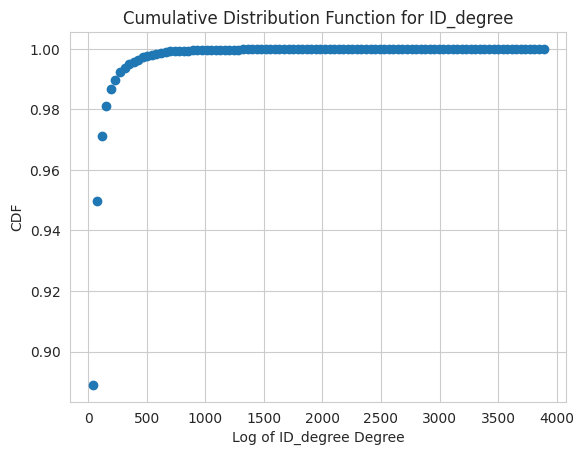

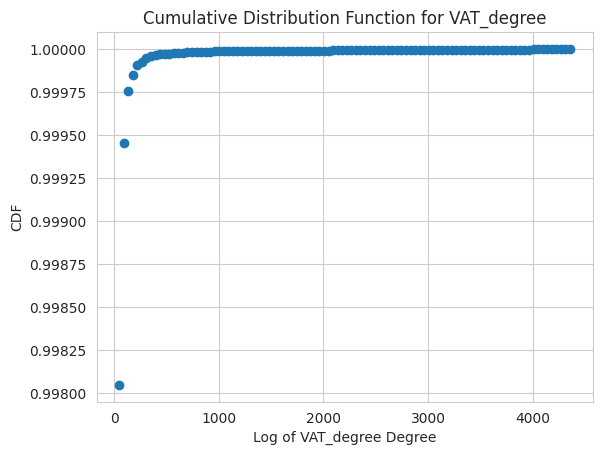

In [ ]:
from numpy import histogram
import numpy as np

def plot_cdf(df, degree_col):
    count_data, bin_edges = histogram(df[degree_col], bins=100)
    cdf = np.cumsum(count_data)
    plt.plot(bin_edges[1:], cdf/cdf[-1], marker='o', linestyle='none')
    plt.xlabel(f'Log of {degree_col} Degree')
    plt.ylabel('CDF')
    plt.title(f'Cumulative Distribution Function for {degree_col}')
    plt.show()

# Call the function for each degree type
plot_cdf(id_degree_dist, 'ID_degree')
plot_cdf(vat_degree_dist, 'VAT_degree')


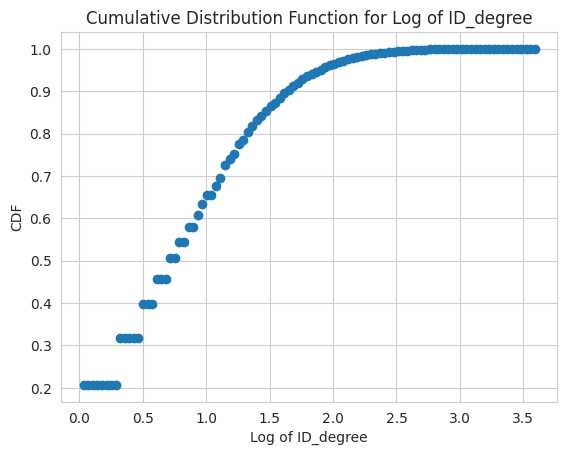

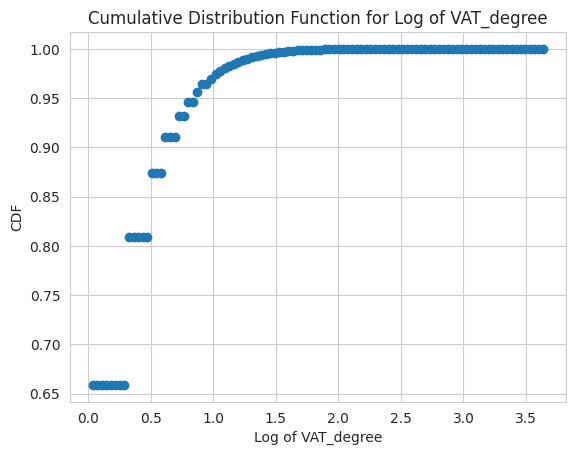

In [ ]:

# Function to plot CDF with logarithmic scale
def plot_log_cdf(df, degree_col):
    df = df[df[degree_col] > 0]  # Remove zeros to avoid -inf values in log
    count_data, bin_edges = np.histogram(np.log10(df[degree_col]), bins=100)
    cdf = np.cumsum(count_data)
    plt.plot(bin_edges[1:], cdf/cdf[-1], marker='o', linestyle='none')
    plt.xlabel('Log of ' + degree_col)
    plt.ylabel('CDF')
    plt.title(f'Cumulative Distribution Function for Log of {degree_col}')
    plt.show()

# Call the function for each degree type
plot_log_cdf(id_degree_dist, 'ID_degree')
plot_log_cdf(vat_degree_dist, 'VAT_degree')


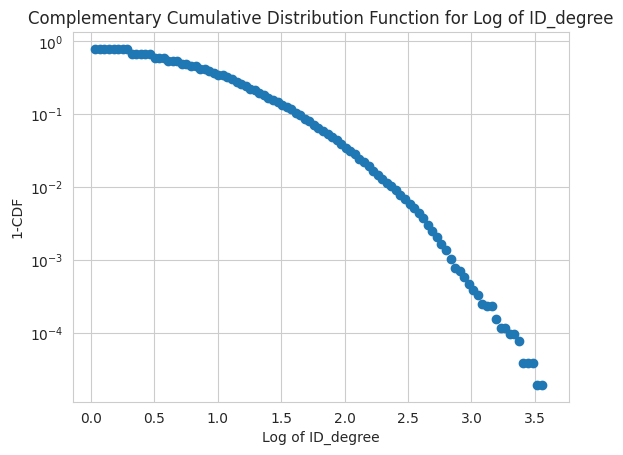

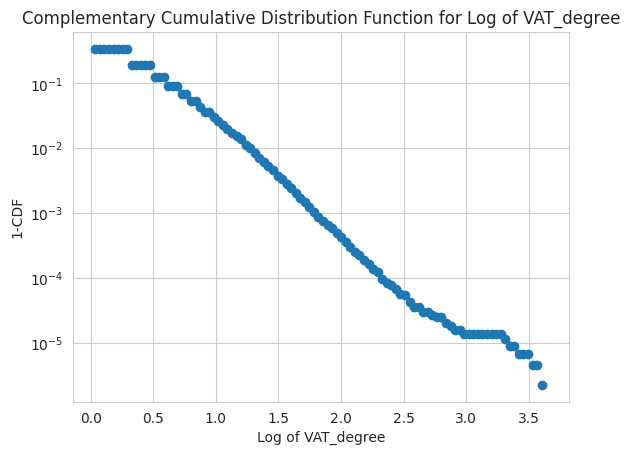

In [ ]:

# Function to plot Complementary CDF with logarithmic scale
def plot_complementary_log_cdf(df, degree_col):
    df = df[df[degree_col] > 0]  # Remove zeros to avoid -inf values in log
    count_data, bin_edges = np.histogram(np.log10(df[degree_col]), bins=100)
    cdf = np.cumsum(count_data)
    complementary_cdf = 1 - cdf/cdf[-1]
    plt.plot(bin_edges[1:], complementary_cdf, marker='o', linestyle='none')
    plt.xlabel('Log of ' + degree_col)
    plt.ylabel('1-CDF')
    plt.title(f'Complementary Cumulative Distribution Function for Log of {degree_col}')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.show()

# Call the function for each degree type
plot_complementary_log_cdf(id_degree_dist, 'ID_degree')
plot_complementary_log_cdf(vat_degree_dist, 'VAT_degree')

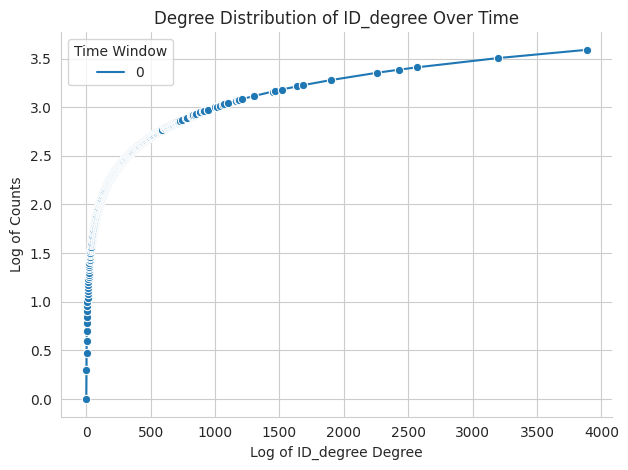

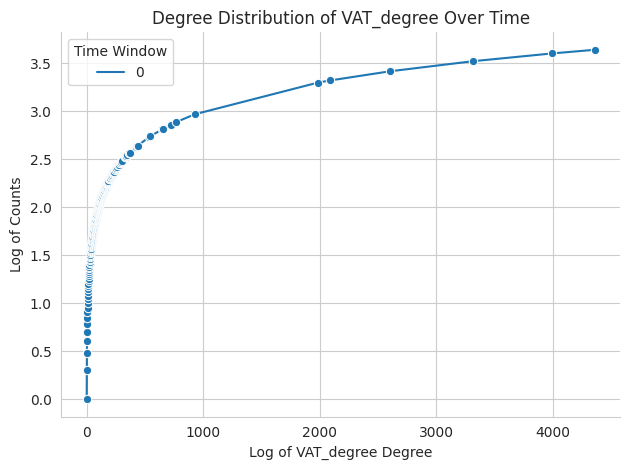

In [ ]:
def plot_degree_distribution(df, column):
    # plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x=column, y='log_'+column, hue='time_window', marker='o')
    plt.xlabel(f'Log of {column} Degree')
    plt.ylabel('Log of Counts')
    plt.title(f'Degree Distribution of {column} Over Time')
    plt.legend(title='Time Window')
    sns.despine()  # Remove the top and right spines from plot
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
    plt.show()

# Call the function for each degree type
plot_degree_distribution(id_degree_dist, 'ID_degree')
plot_degree_distribution(vat_degree_dist, 'VAT_degree')


In [ ]:
def save_plot(df, column, filename):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(data=df, x=column, y='log_counts', hue='time_window', marker='o', ax=ax)
    ax.set_xlabel(f'Log of {column} Degree')
    ax.set_ylabel('Log of Counts')
    ax.set_title(f'Degree Distribution of {column} Over Time')
    ax.legend(title='Time Window')
    sns.despine()
    plt.tight_layout()
    fig.savefig(f'./../../figures/{filename}.png', dpi=300)

# Save plots to disk
save_plot(id_degree_dist, 'ID_degree', 'id_degree_distribution')
save_plot(vat_degree_dist, 'VAT_degree', 'vat_degree_distribution')


NameError: name 'id_degree_dist' is not defined